<a href="https://colab.research.google.com/github/bigdata210/Python/blob/main/yse/python230414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
titanic = pd.read_csv(url)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Pandas 라이브러리의 'group by'

In [ ]:
# 성별에 따른 평균 나이
grouped = titanic.groupby("Sex")["Age"].agg("mean")
grouped

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
# Groupby에서 컬럼을 추가
# 원하는 컬럼과 수식을 딕셔너리로 묶어서 관리하는 것이 편하다. 
agg_dict = {'Age':'mean', 'Fare':'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

,Age,Fare
Sex,,
female,27.915709,23.0
male,30.726645,10.5


In [ ]:
# Fare에서 중간값, 평균값을 구하기
agg_dict = {'Age':'mean', 'Fare': ['median','sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
print(grouped)
print(grouped.columns.values)


              Age   Fare            
             mean median         sum
Sex                                 
female  27.915709   23.0  13966.6628
male    30.726645   10.5  14727.2865
[('Age', 'mean') ('Fare', 'median') ('Fare', 'sum')]


In [ ]:
# 성별을 단일 컬럼으로
agg_dict = {'Age':'mean', 'Fare':'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
result = grouped.reset_index()
result

,Sex,Age,Fare
0,female,27.915709,23.0
1,male,30.726645,10.5


In [ ]:
# 성별만 단일컬럼
agg_dict = {'Age':'mean', 'Fare':'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
print(grouped.columns)
print(type(grouped))

Index(['Age', 'Fare'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [ ]:
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)
print(grouped)

      Sex   Age_mean  Fare_median    Fare_sum
0  female  27.915709         23.0  13966.6628
1    male  30.726645         10.5  14727.2865


In [ ]:
add_dict = {'Age':'mean','Fare':['median','sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
new_cols = []
for col in grouped.columns:
  if isinstance(col, tuple):
    new_col = f'{col[0]}_{col[1]}'
  else:
    new_col = col

  new_cols.append(new_col)

grouped.columns = new_cols
result = grouped.reset_index()
result

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


# matplotlib 라이브러리
- 참고: https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)

3.7.1


In [ ]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

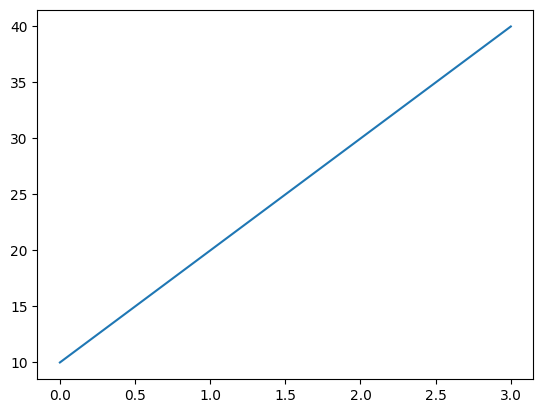

In [ ]:
# 모두의 데이터분석 with 파이썬
# p.56 code
plt.plot([10,20,30,40])
plt.show()

# -> 수정이 불가!!

- matplotlib 그릴 때, 객체지향으로 그린다!! 

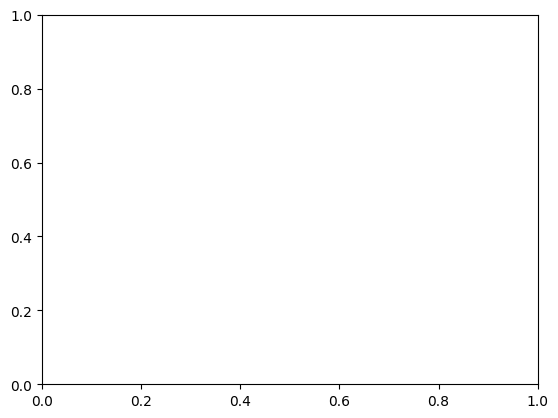

In [ ]:
# 그래프 기본 문법
fig, ax = plt.subplots()
plt.show()

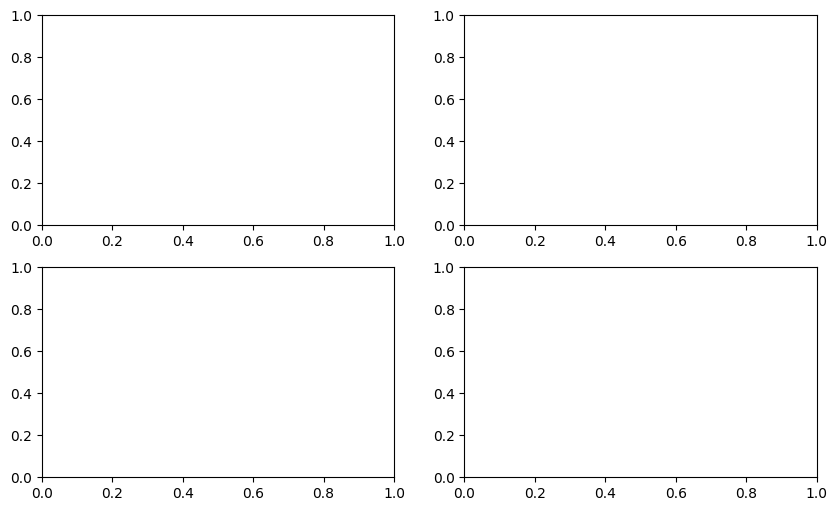

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot()
# -> 두 개를 합쳐서 적음.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6))

plt.show()

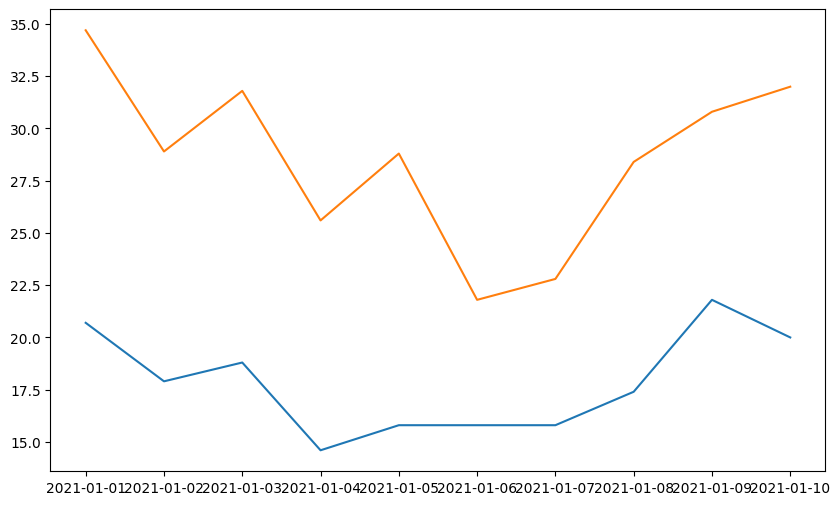

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(dates, min_temperature, label = "Min Temp.")
ax.plot(dates, max_temperature, label = "Max Temp.")
plt.show()

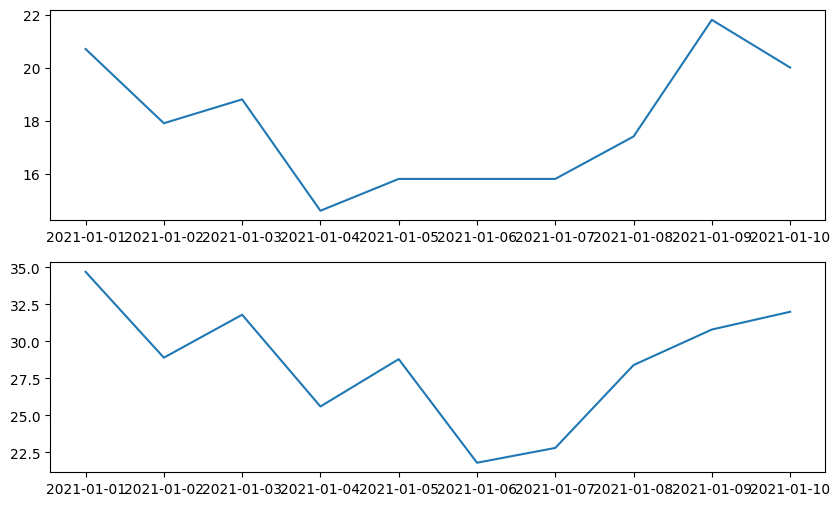

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,6))
ax[0].plot(dates, min_temperature, label = "Min Temp.")
ax[1].plot(dates, max_temperature, label = "Max Temp.")
plt.show()

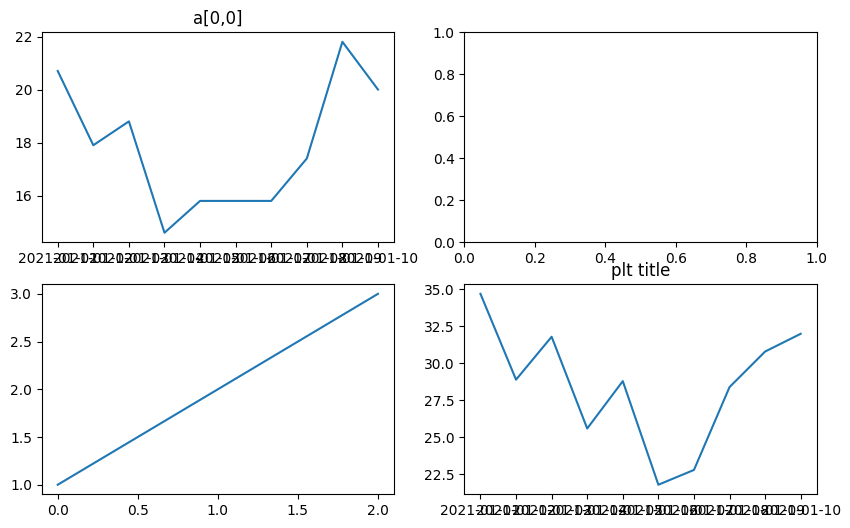

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6))
#ax[0].plot(dates, min_temperature, label = "Min Temp.")
#ax[1].plot(dates, max_temperature, label = "Max Temp.")
#plt.show()
# -> AttributeError: 'numpy.ndarray' object has no attribute 'plot'
# 2행 2열이 맞지 않으므로 [0,0]이나 [1,1]로 바꿔야 한다.

ax[0,0].plot(dates, min_temperature, label = "Min Temp.")
ax[0,0].set_title("a[0,0]")   #set_title()로 보통 사용.
ax[1,0].plot([1,2,3])
ax[1,1].plot(dates, max_temperature, label = "Max Temp.")
plt.title("plt title")
plt.show()


## 선그래프

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
TSLA = yf.download("TSLA", start = '2019-08-01', end = '2023-04-13')
AAPL = yf.download("AAPL", start = '2019-08-01', end = '2023-04-13')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


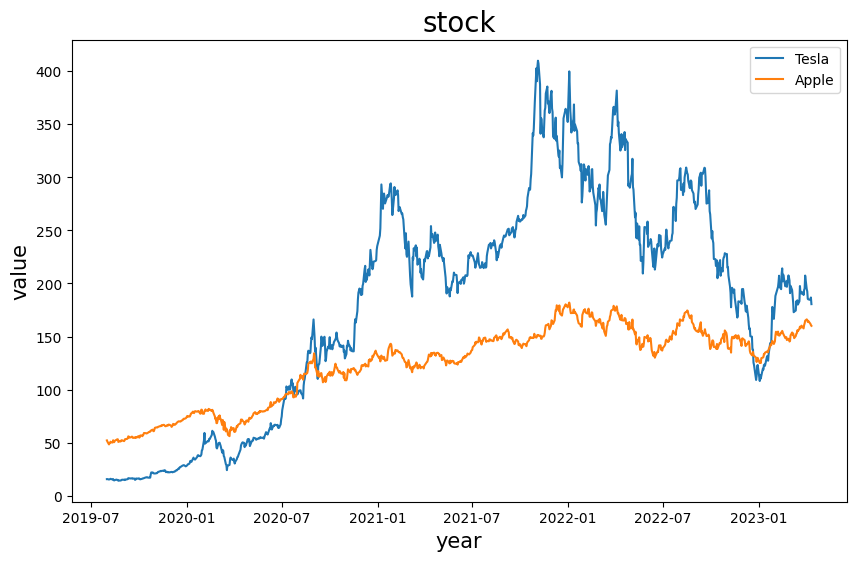

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(TSLA['Close'], label = 'Tesla')
ax.plot(AAPL['Close'], label = 'Apple')
ax.legend()

# title, xlabel, ylabel를 입력하시오.
ax.set_title("stock", size = 20)
ax.set_xlabel('year', size = 15)
# 비추천 : plt.xlabel("xlabel") , plt.ylabel("ylabel") 
ax.set_ylabel('value', size = 15)
plt.show()


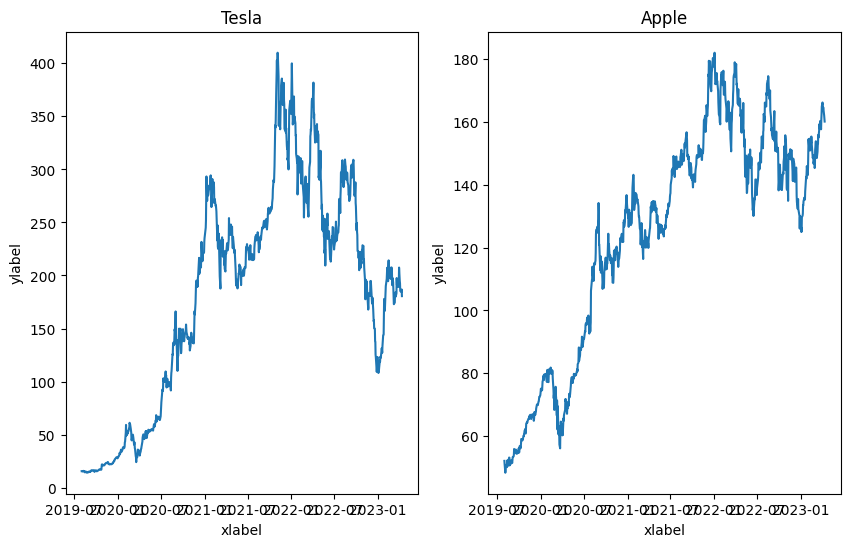

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
ax[0].plot(TSLA['Close'], label = "Tesla")
ax[0].set_title("Tesla")
ax[0].set_xlabel("xlabel")
ax[0].set_ylabel('ylabel')

ax[1].plot(AAPL['Close'], label = "Apple")
ax[1].set_title("Apple")
ax[1].set_xlabel("xlabel")
ax[1].set_ylabel('ylabel')
plt.show()

In [ ]:
# 4종목의 주식 비교하기
LUCY = yf.download("LUCY", start = '2019-08-01', end = '2023-04-13')
NVAX = yf.download("NVAX", start = '2019-08-01', end = '2023-04-13')
SNOW = yf.download("SNOW", start = '2019-08-01', end = '2023-04-13')
WW = yf.download("WW", start = '2019-08-01', end = '2023-04-13')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


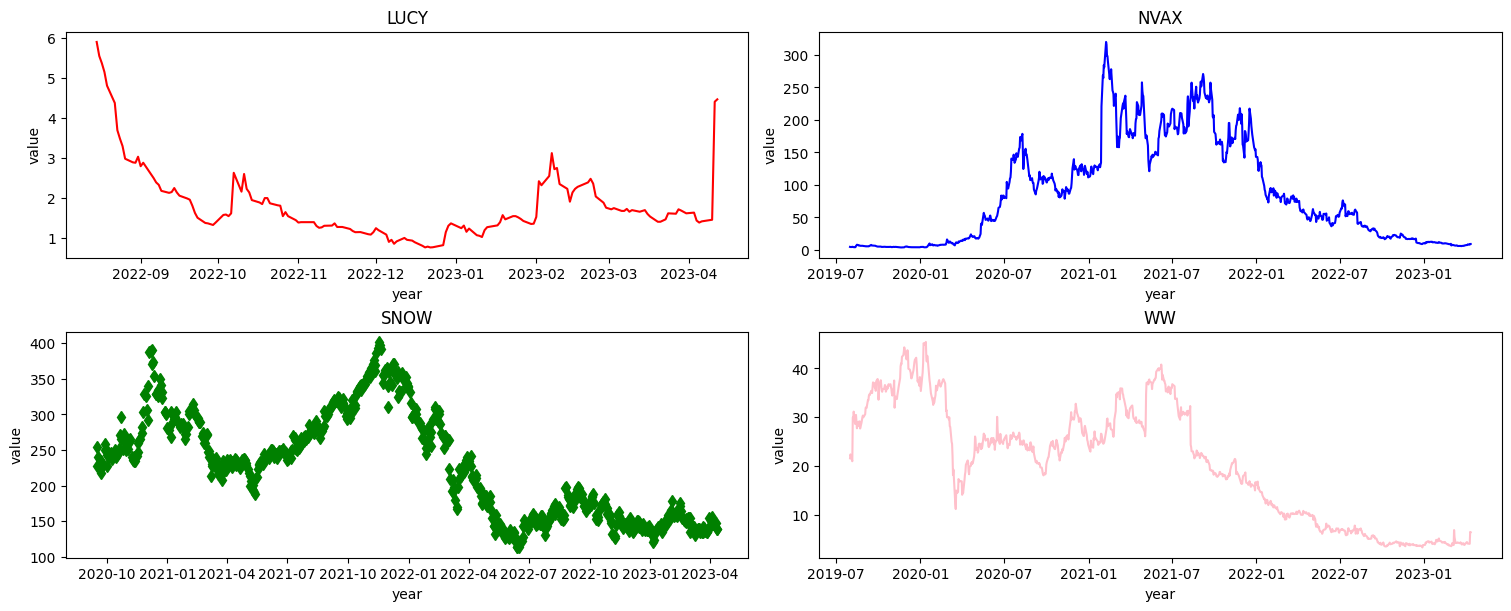

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,6), layout="constrained")
ax[0,0].plot(LUCY['Close'], label = 'LUCY', color='red')
ax[0,0].set_title("LUCY")
ax[0,0].set_xlabel("year")
ax[0,0].set_ylabel("value")
#ax[0,0].text("max",fontweight="bold", color="red")

ax[0,1].plot(NVAX['Close'], label = 'NVAX', color='blue')
ax[0,1].set_title("NVAX")
ax[0,1].set_xlabel("year")
ax[0,1].set_ylabel("value")

ax[1,0].plot(SNOW['Close'], 'd', label = 'SNOW', color='green')
ax[1,0].set_title("SNOW")
ax[1,0].set_xlabel("year")
ax[1,0].set_ylabel("value")

ax[1,1].plot(WW['Close'], label = 'WW', color='pink')
ax[1,1].set_title("WW")
ax[1,1].set_xlabel("year")
ax[1,1].set_ylabel("value")

plt.show()

# Seaborn 라이브러리
- 참고: https://seaborn.pydata.org/generated/seaborn.displot.html

  + tips data 설명 : https://rdrr.io/cran/reshape2/man/tips.html

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


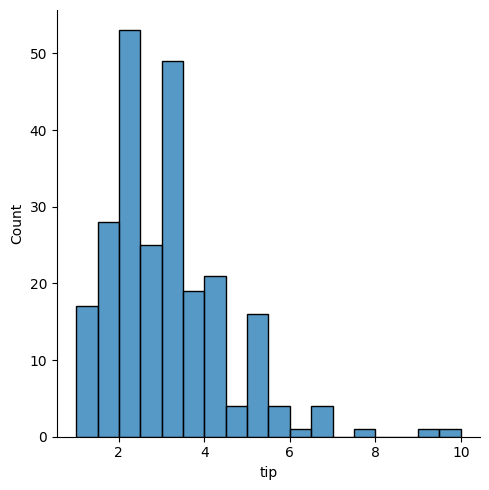

In [ ]:
# 간단히 그래프 그리기
sns.displot(x = "tip", data = tips)

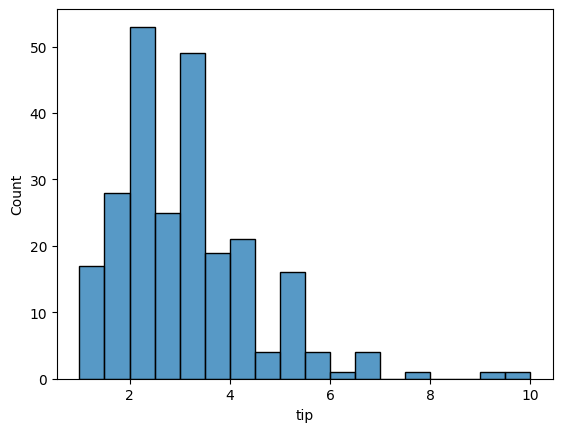

In [ ]:
# 객체지향으로 그래프 그리기
fig, ax = plt.subplots()
sns.histplot(x = "tip", data = tips, ax = ax)

plt.show()

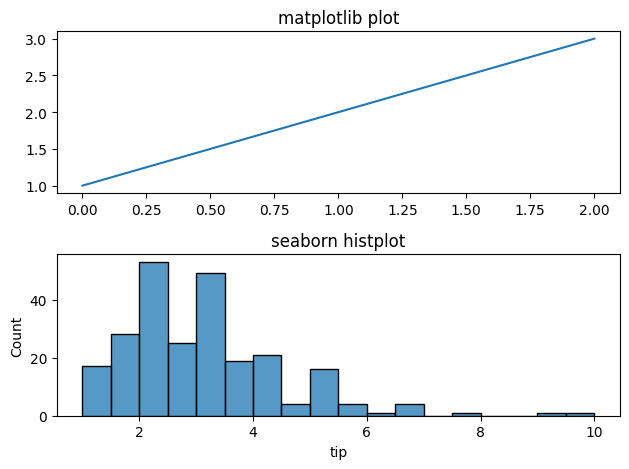

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot([1,2,3])  # matplotlib 라이브러리
ax[0].set_title("matplotlib plot")

sns.histplot(x = "tip", data = tips, ax = ax[1])
# ax[1]로 했을 때 seaborn 라이브러리가 matplotlib 라이브러리와 연동됨.
ax[1].set_title("seaborn histplot")

# 그래프 사이의 간격을 조절해줌.
plt.tight_layout()
plt.show()

## 막대 그래프


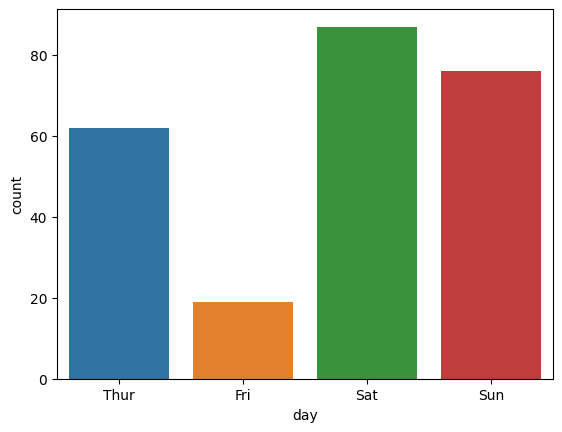

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x = 'day', data = tips)
plt.show()

그래프 타입: <class 'matplotlib.axes._axes.Axes'>


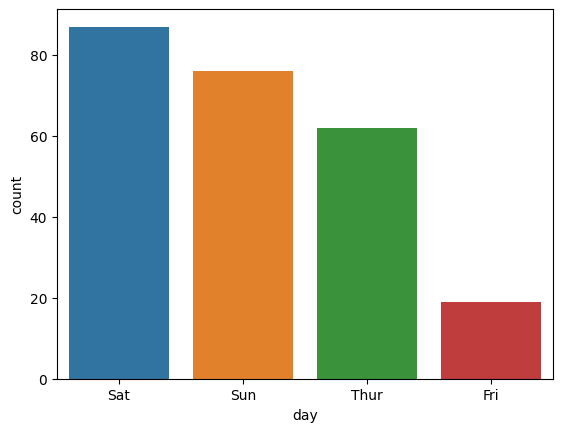

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips, 
                   order = tips['day'].value_counts().index)
                  # order = ['Sat', 'Sun', 'Thur', 'Fri']와 같다.
print("그래프 타입:", type(ax))
plt.show()

In [ ]:
tips['day'].value_counts().index
# ['Sat', 'Sun', 'Thur', 'Fri'] 순서로 정렬

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

- Rectangle
  + 참고: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

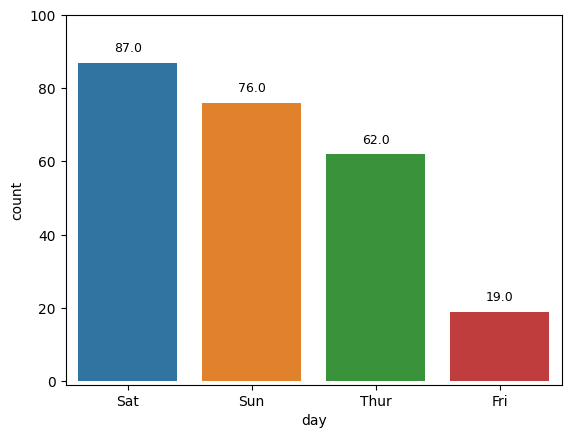

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips, 
                   order = tips['day'].value_counts().index)  # seaborn 라이브러리
for p in ax.patches:
 # print(p, type(p))
   height = p.get_height()
   ax.text(x= p.get_x() + p.get_width() / 2,      # matplotlib 
           y = height + 3, 
           s = height, ha = 'center', size = 9)
   
ax.set_ylim(-1,100)    # matplotlib
plt.show()

# Rectangle (matplotlib.patches.Rectangle)의 메소드 사용